Group Members Name: Suresh Kumar Choudhary, Sofya Laskina, Emilio Kuhlmann
Master Data Science

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import metrics

First of all: we are going to introduce a dataset on that we apply our clustering method on:

In [121]:

def twospirals(n_points, noise=.5):
    """
     Returns the two spirals dataset.
    """
    epsilon = 0.1
    n = (np.random.rand(n_points,1)+epsilon) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise

    # hstack/vstack stacks data on top of each other (print shape to see what I mean)
    C_1 = np.hstack((d1x,d1y))
    C_2 = np.hstack((-d1x,-d1y))
    return np.vstack((C_1, C_2))

This is a dataset consisting of clusters twisting around each other. You don't need to understand the mathematics behind it, but you can play around with it if you like (make sure to train on the original dataset, not one you created)



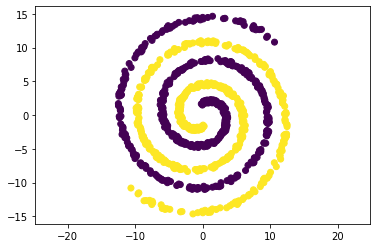

In [122]:

def dataset_creation(data_size=500):
    dataset = twospirals(data_size)
    labels = np.hstack((np.zeros(data_size),np.ones(data_size)))
    return (dataset,labels)
# scatter makes a 2D scatter plot. Unfortunately you have to seperate the x-dim from the y-dim
# the labels are helpful for coloring. The algorithm does not use them, since this is unsupervised
np.random.seed(10)
dataset,labels_true=dataset_creation(data_size=500)
plt.scatter(dataset[:,0], dataset[:,1], c = labels_true)
plt.axis('equal')
plt.show()

a) Implement the DBSCAN algorithm to classify points of the two clusters.

b) Plot a scatter plot highlighting the clusters that were found after finding good hyperparameter values eps and minPts.

c) Print accuracies for different data_size values.

d) For what kind of data_size values does the algorithm fail and why? What would you say are disadvantages of DBSCAN?

In [123]:
import sys 
  
# the setrecursionlimit function is 
# used to modify the default recursion 
# limit set by python. Using this,  
# we can increase the recursion limit 
# to satisfy our needs 
  
sys.setrecursionlimit(10**6) 


def euclidean_distance(x_1, x_2):
    #print(x_1,x_2)
    return np.sqrt(np.sum((x_1-x_2)**2, axis = 1))



In [124]:
def lookup_table(dataset,eps):
    lookup_2d_table={}
    for pos, val in enumerate(dataset):
        dist=euclidean_distance(val, dataset)
        lookup_2d_table[pos]= np.argwhere((dist<=eps)==True).flatten()
    return lookup_2d_table

        
        

In [125]:
'Noise=None, undefined/unvisited=-1'

def dbscan(data,Eps=2,minPts=1.7):
    n_points = len(data)
    #print(n_points)
    label = [-1] * n_points
    C=-1 #cluster initialization
    S=set()
    rangeQuery=lookup_table(data,Eps)
    for x, val in enumerate(data):
        if label[x]!=-1: #we only want unvisited points
            #print('unclassifief:',x)
            continue
        N=rangeQuery[x]
        if len(N) < minPts: #x is border or noise point
            label[x]=None #noise point
            continue #check next point in Dataset X
        C = C + 1
        label[x]=C #x gets new cluster id
        S.update(N)
        S.discard(x)
        while len(S)>0:
            y=S.pop()
            if label[y] == None:
                label[y] = label[x] # y is border point
            if label[y] !=-1: # y has label, get new y
                continue
            label[y] = label[x] #y belongs to x‘s cluster
            N = rangeQuery[y]
            if len(N) >= minPts:# y is core point of same cluster
                S.update(N)
    return label

a) Use Mathplotlib to create a scatter plot highlighting the clusters that were

found after finding good hyperparameter values eps and minPts.

In [126]:
def cluster_plot(dataset,labesl,Eps,minPts,data_size,acc,sil_coef):
    # scatter makes a 2D scatter plot. Unfortunately you have to seperate the x-dim from the y-dim
    # the labels are helpful for coloring. The algorithm does not use them, since this is unsupervised
    plt.scatter(dataset[:,0], dataset[:,1], c = labels)
    plt.axis('equal')
    plt.title(f'Eps={Eps},minPts={minPts},data_size={data_size},Accuracy={acc}% and silhouette_score={sil_coef}')
    plt.show()

In [127]:
#Eps and minPts hyperparameter tuning
Eps_list=[x for x in np.arange(0.1,2,0.05)]
minPts_list=[x for x in np.arange(2,10,1)]
acc_list=[]
sil_coef=[]
tup_list=[]
for minPts in minPts_list:
    for Eps in Eps_list:
        np.random.seed(10)
        dataset,labels_true=dataset_creation(data_size=500)
        labels=dbscan(dataset,Eps,minPts)
        #cluster_plot(dataset,labels)
        correct_classified=len(np.argwhere((labels_true==labels)==True))
        acc=(correct_classified*100)/len(dataset)
        acc_list.append(acc)
        #print('acc with funct',accuracy_score(labels_true,labels))
        n_clusters = len(set(labels)) - (1 if None in labels else 0)
    
        #print(f'Accuracy with data size {data_size} is {acc}%')
    
        labels=[x if x !=None else -1 for x in labels]
        if n_clusters>1:
            #print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(dataset, labels))
            sil_coef.append(metrics.silhouette_score(dataset, labels))
        else:
            sil_coef.append(-1)
        tup_list.append([Eps,minPts,acc,sil_coef[-1]])

In [128]:
best_Eps,best_minPts,best_acc,best_s_c=sorted(tup_list,key=lambda x: (x[2],x[3]),reverse=True)[0]

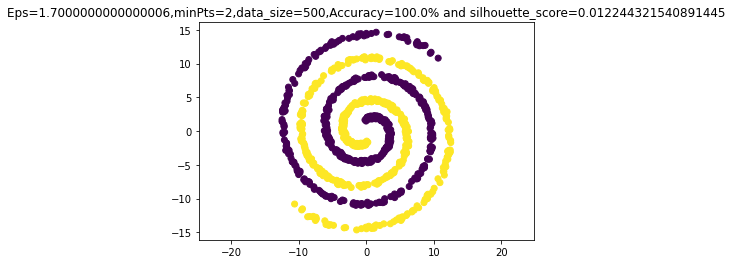

In [132]:
#best hyperparameters DBSCAN clustering 
np.random.seed(10)
dataset,labels_true=dataset_creation(data_size=500)
labels=dbscan(dataset,best_Eps,best_minPts)
cluster_plot(dataset,labels,Eps=best_Eps,minPts=best_minPts,data_size=500,acc=best_acc,sil_coef=best_s_c)

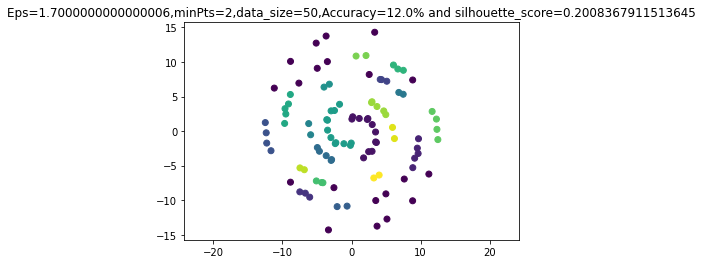

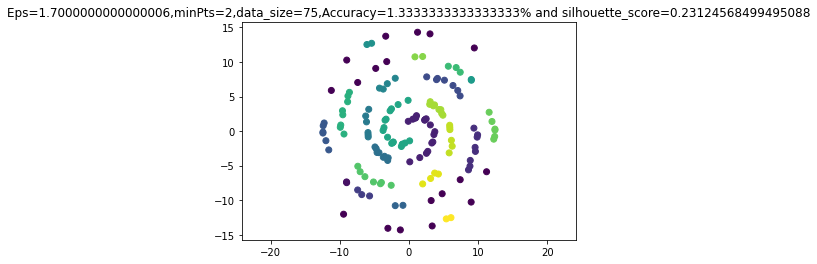

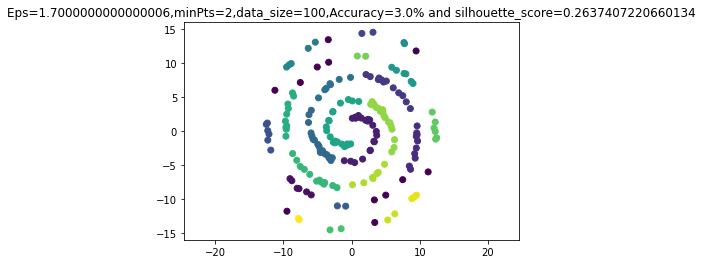

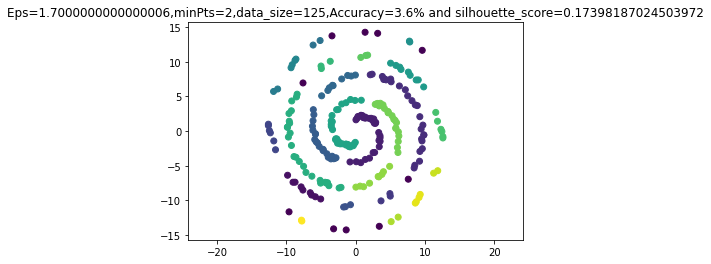

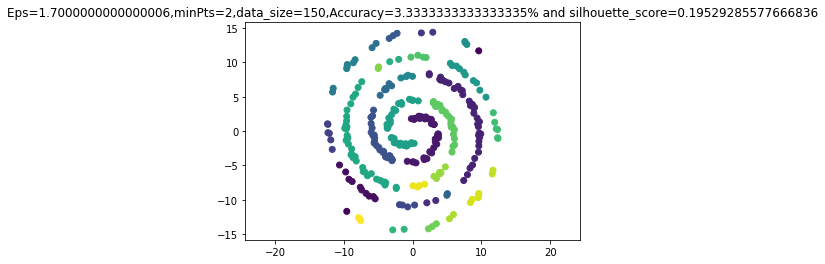

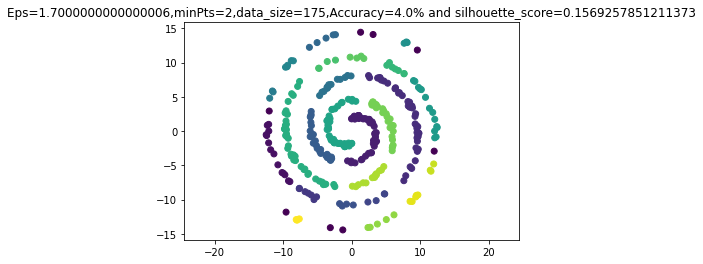

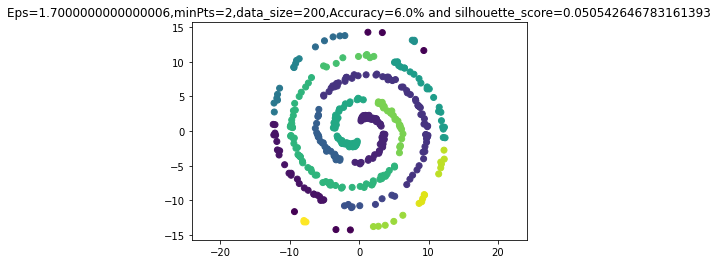

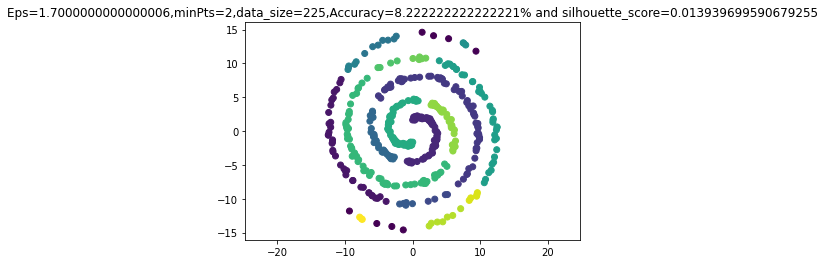

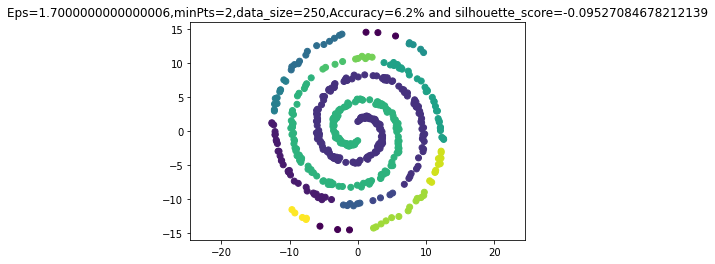

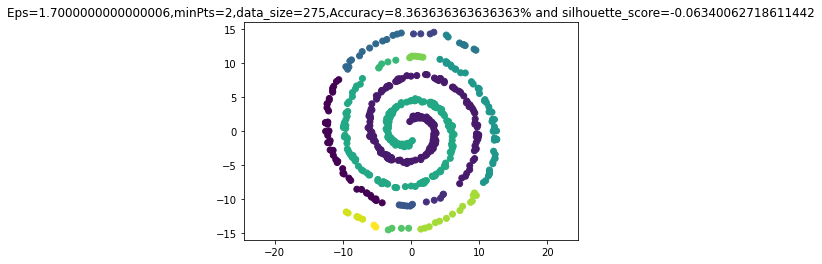

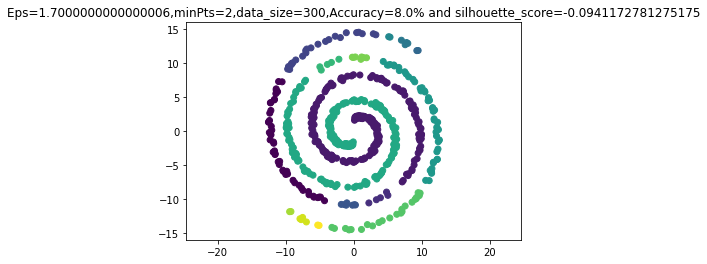

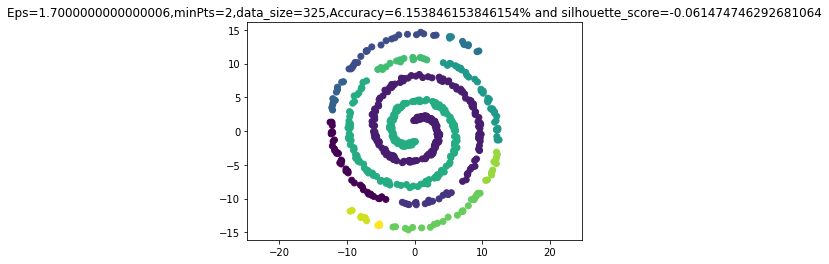

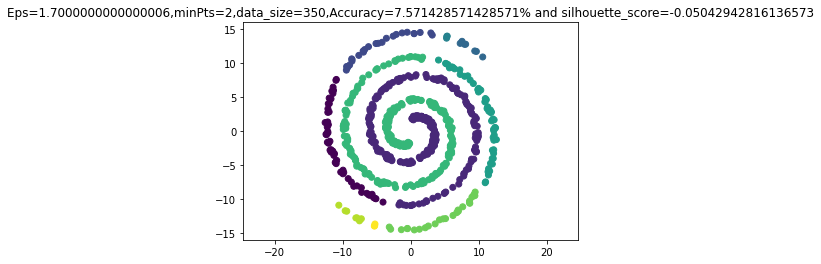

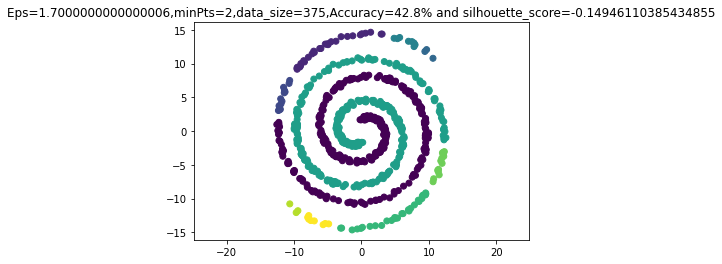

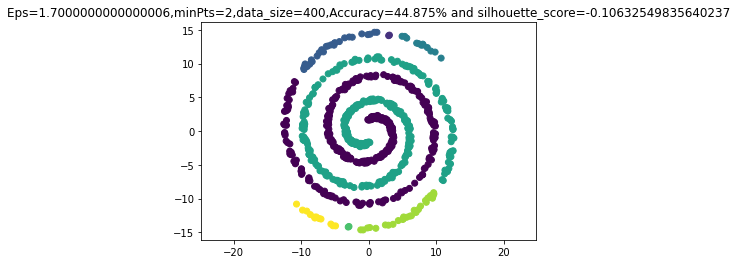

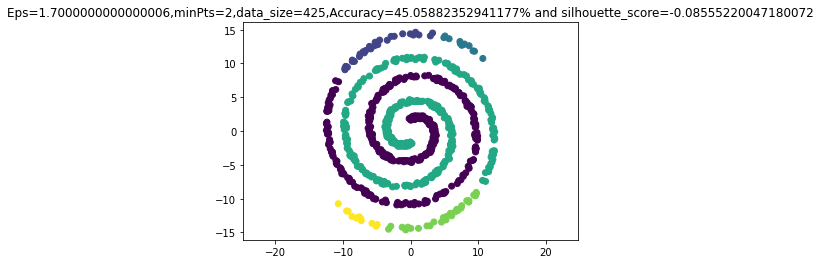

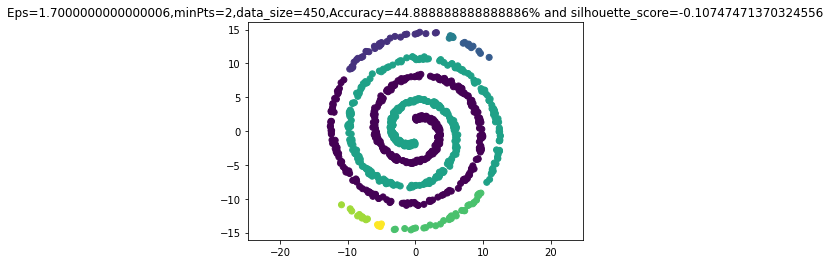

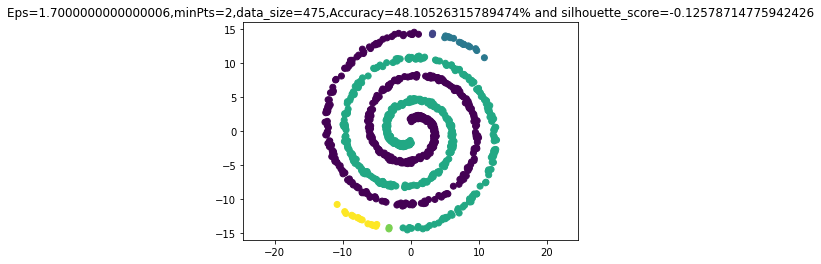

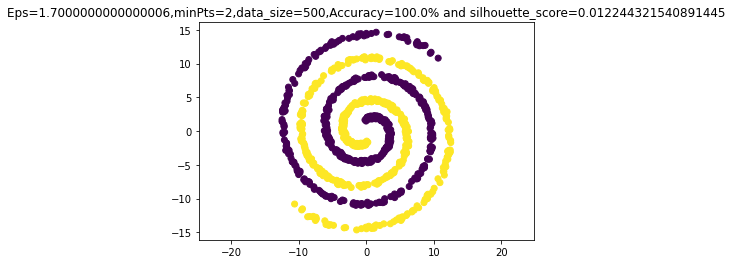

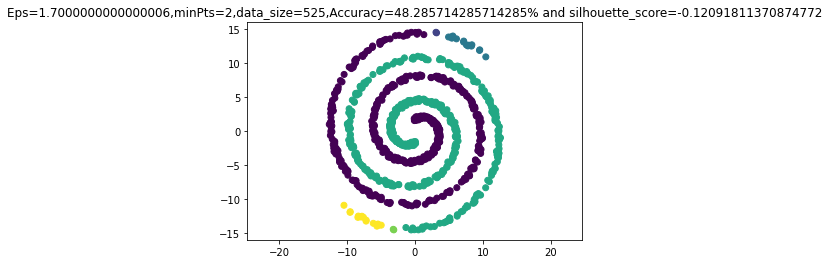

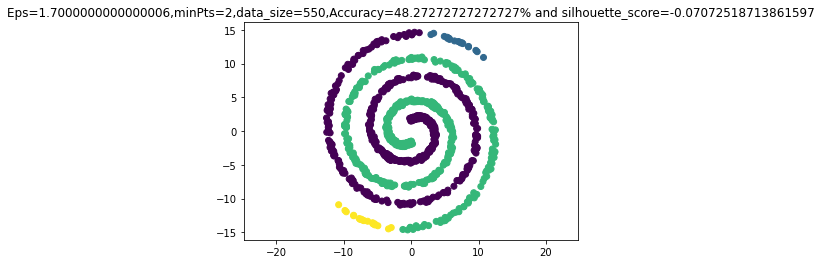

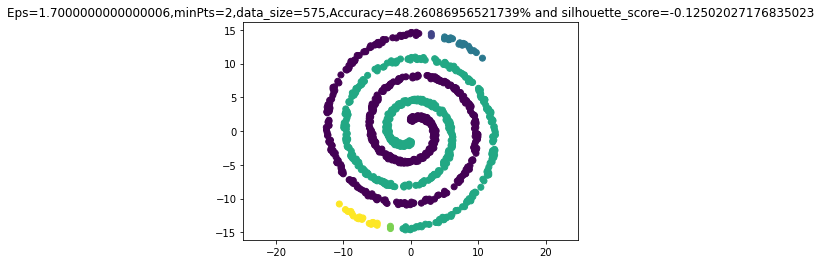

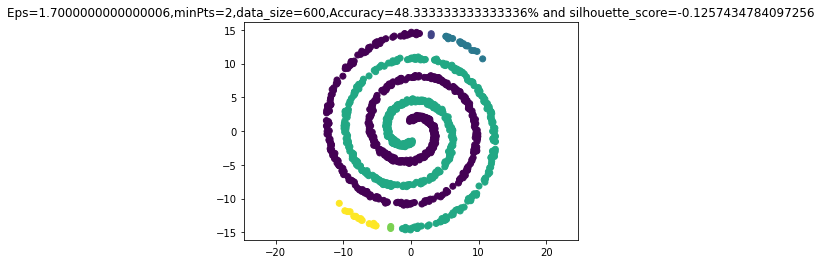

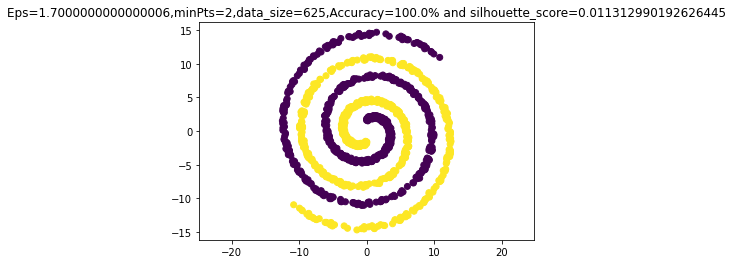

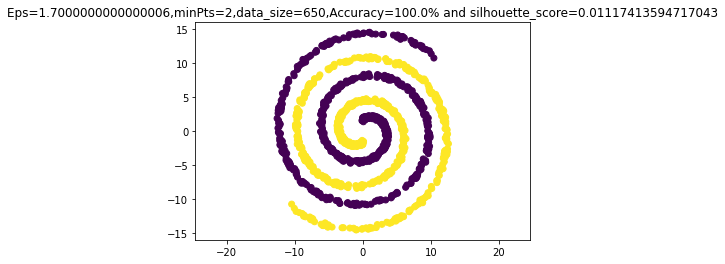

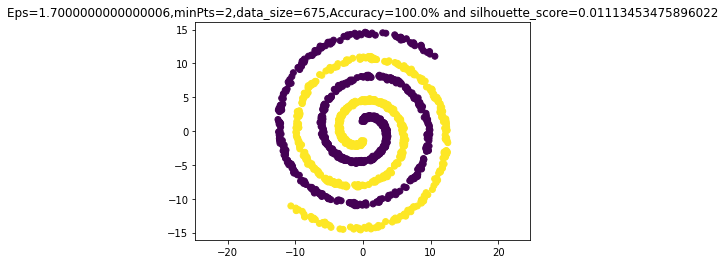

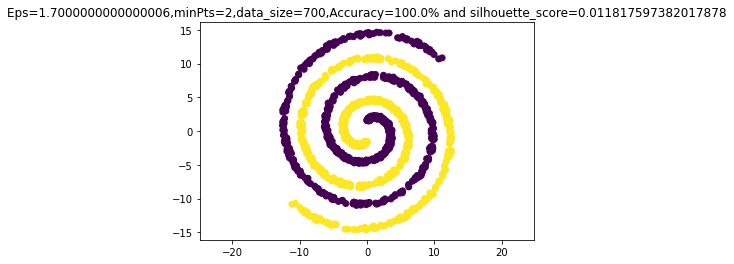

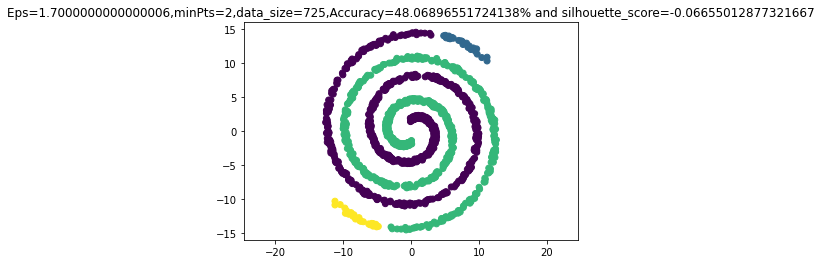

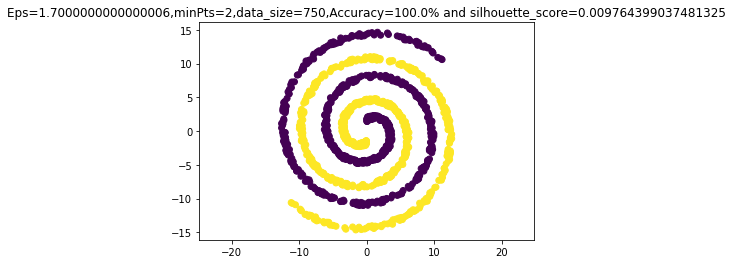

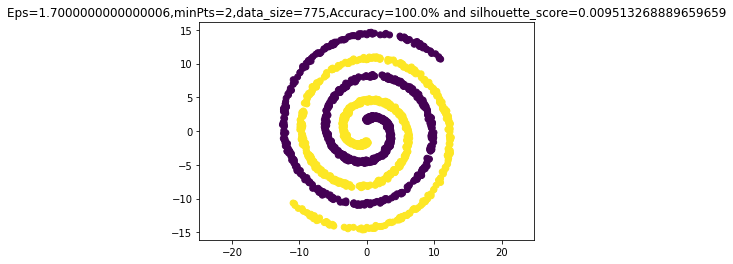

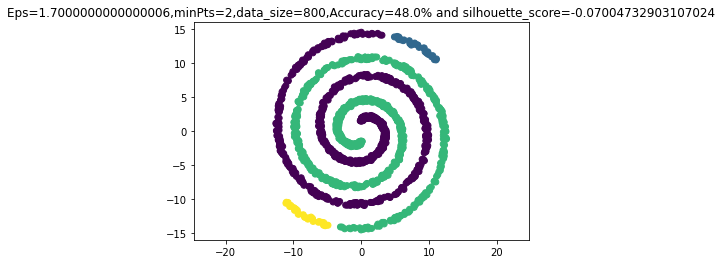

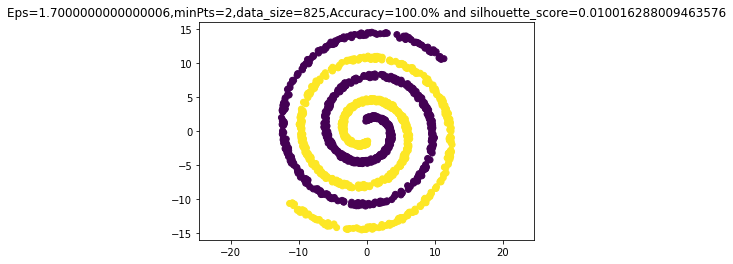

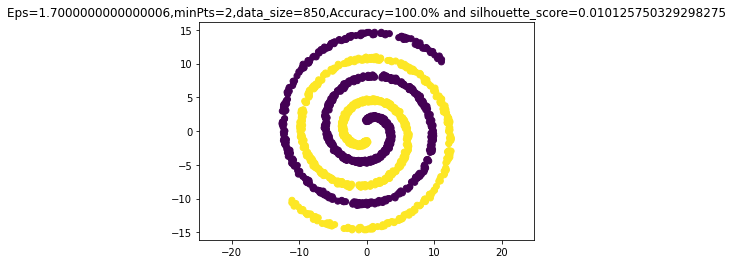

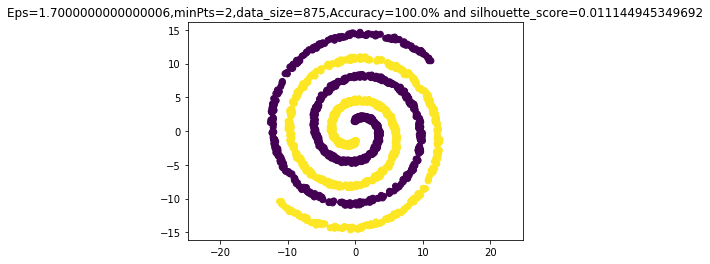

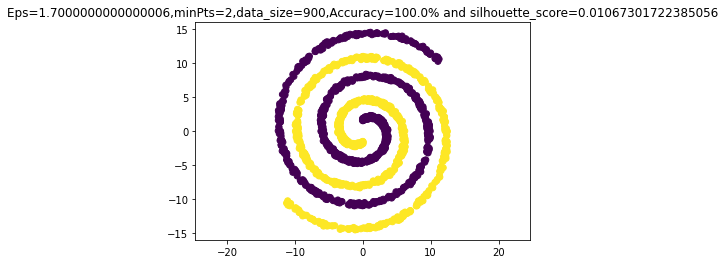

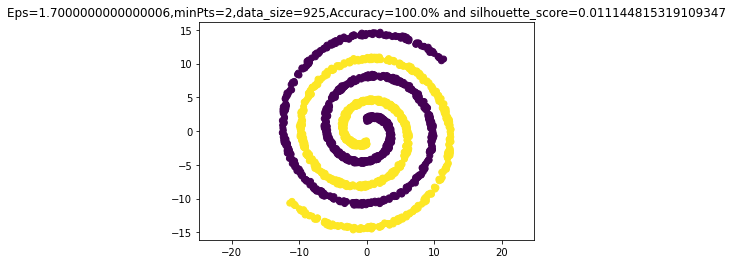

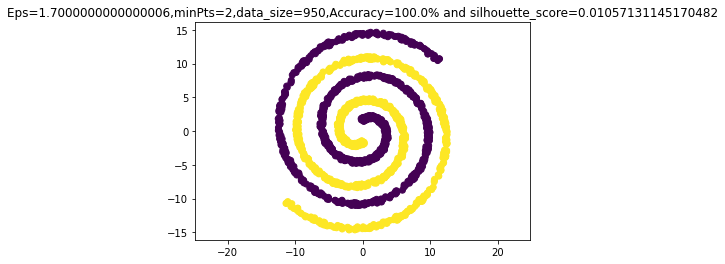

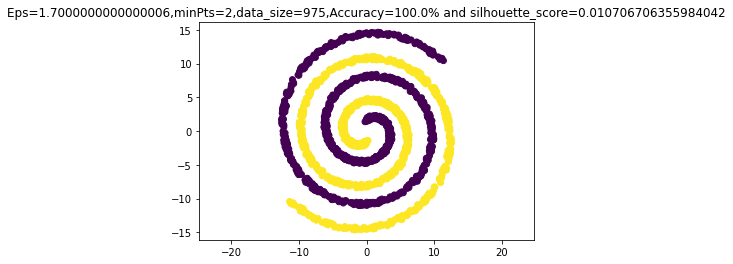

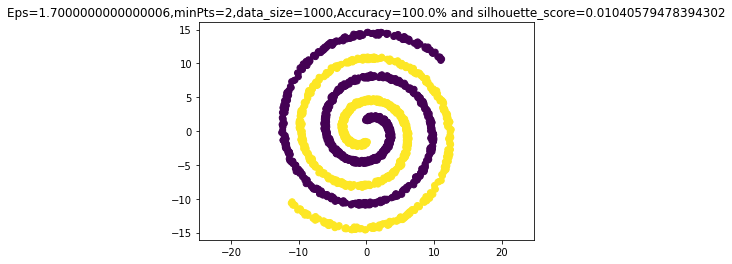

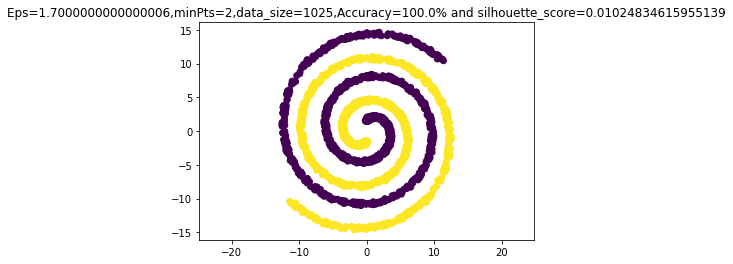

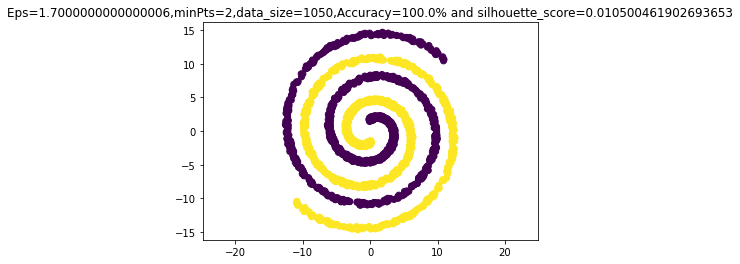

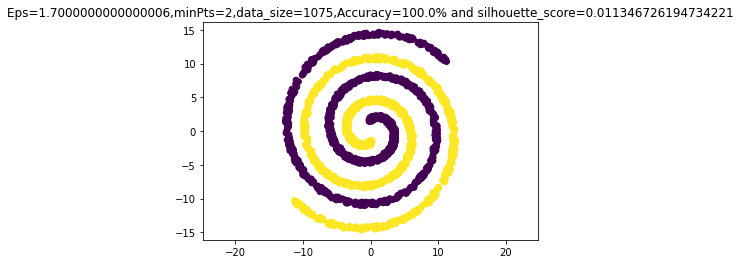

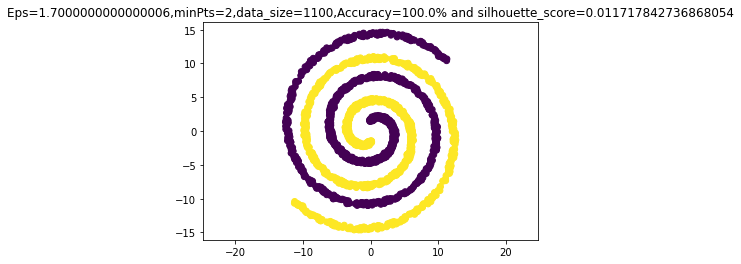

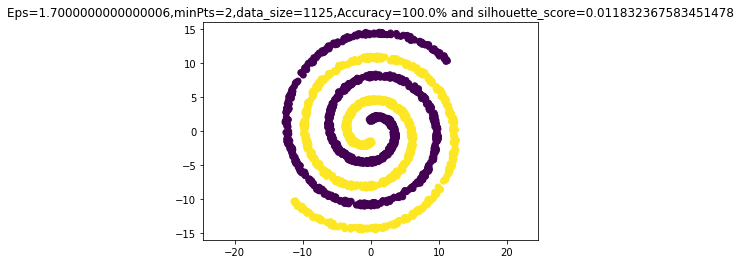

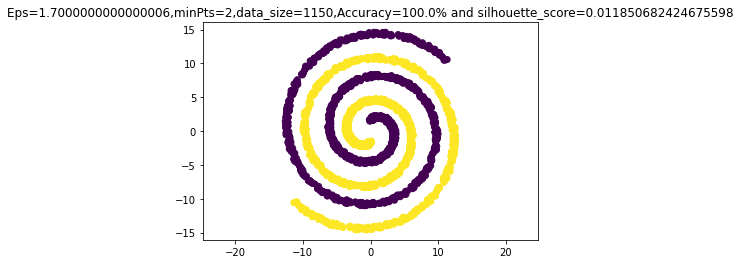

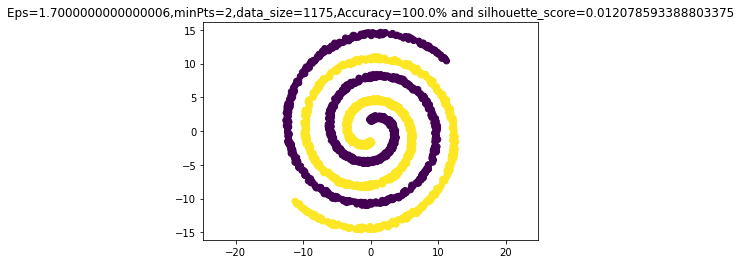

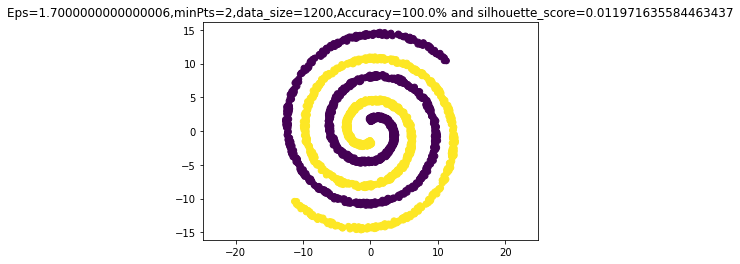

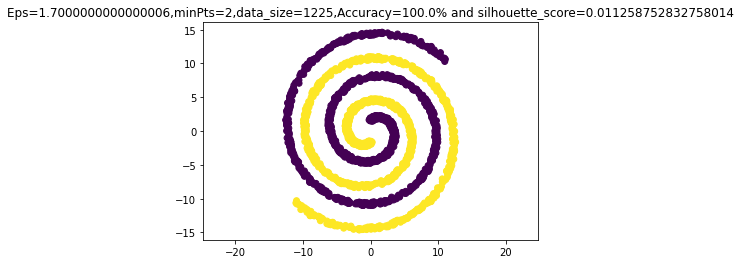

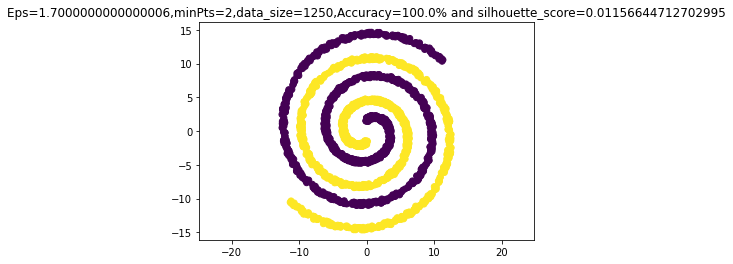

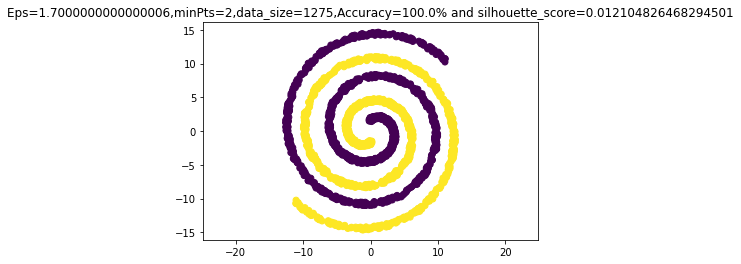

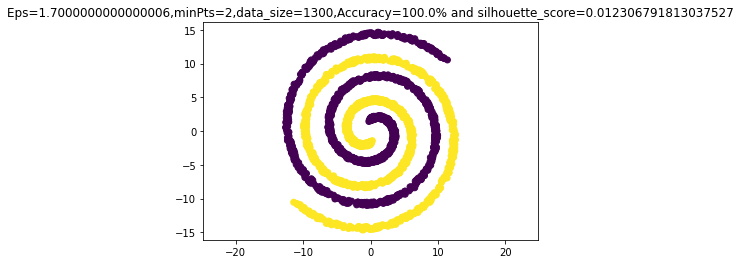

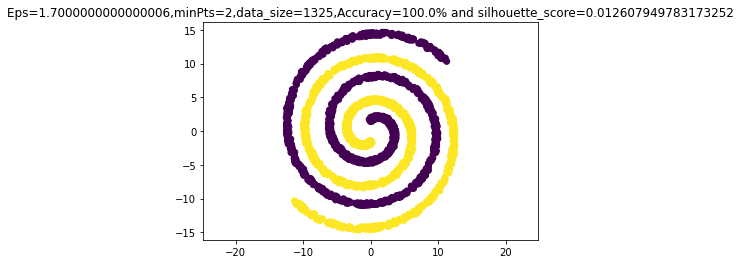

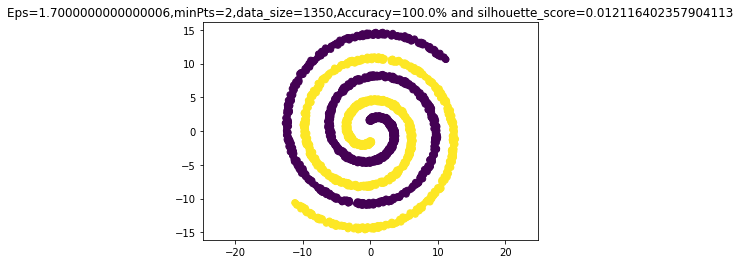

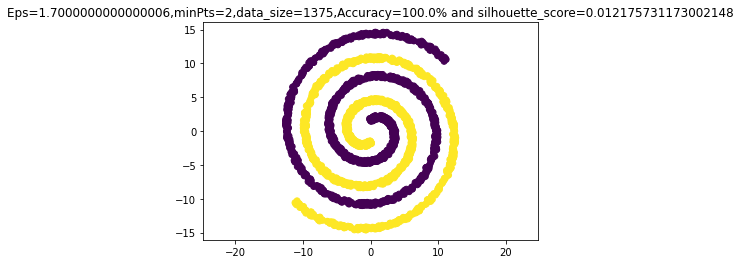

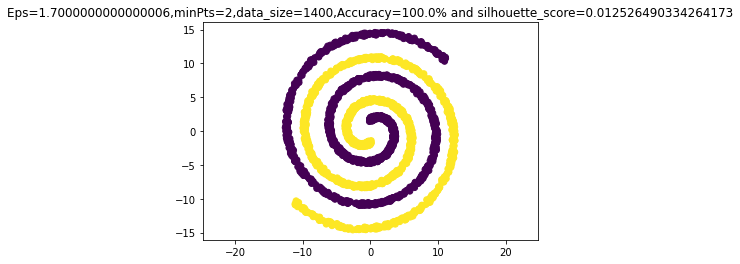

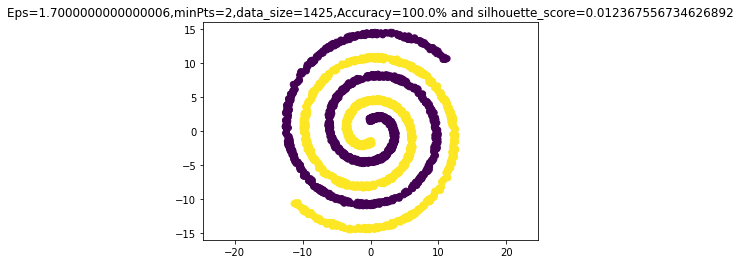

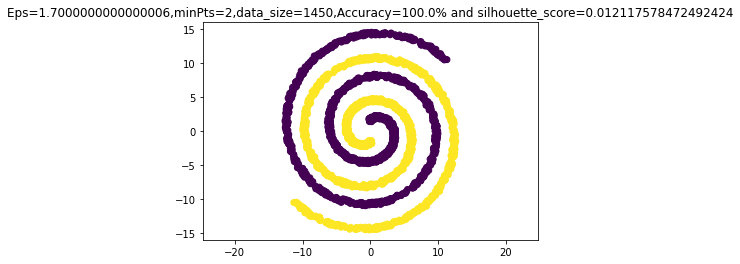

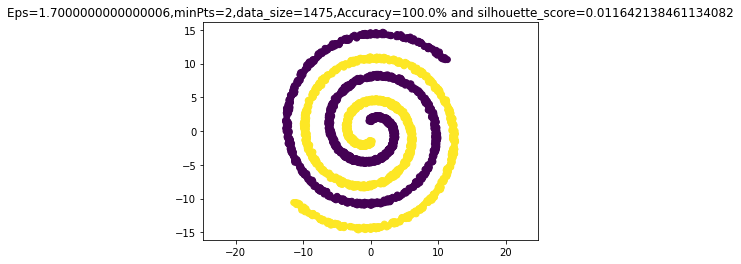

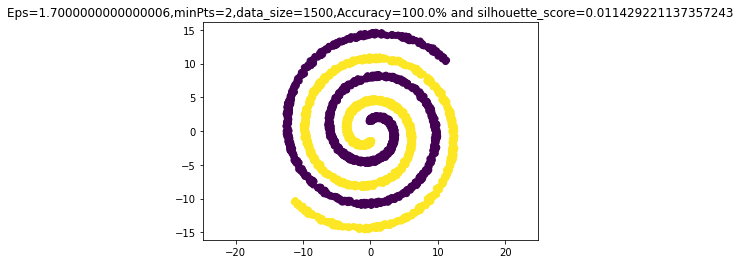

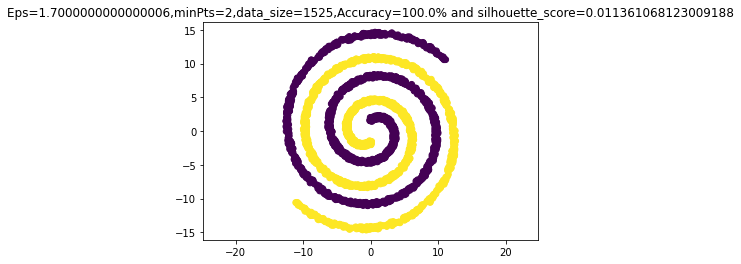

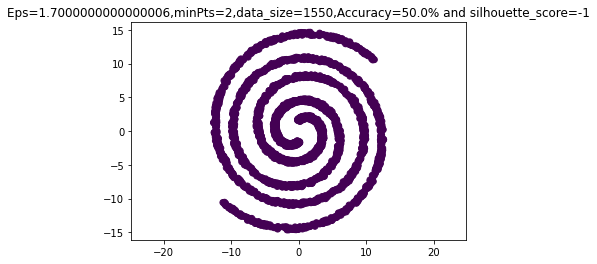

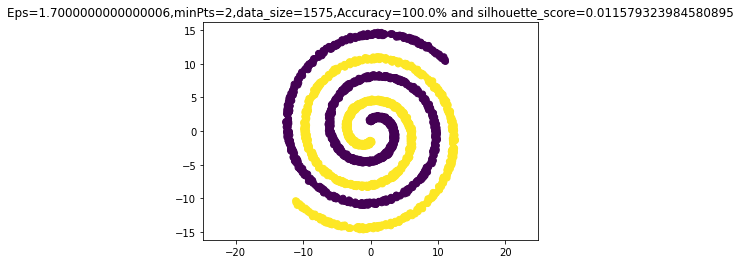

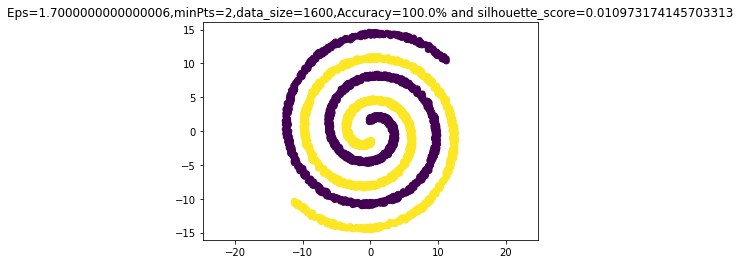

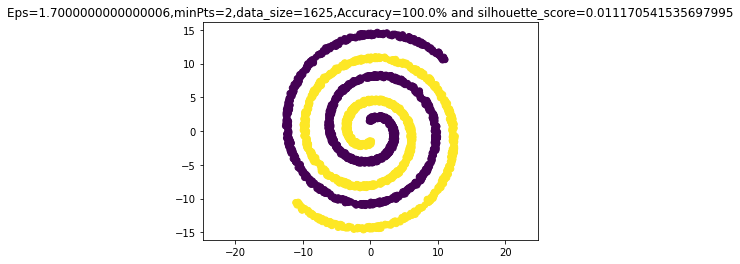

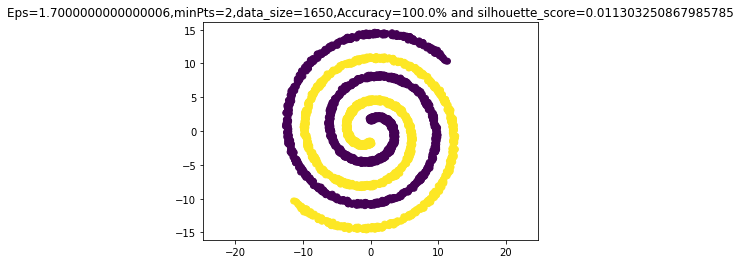

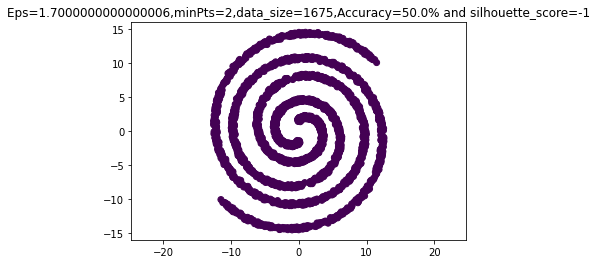

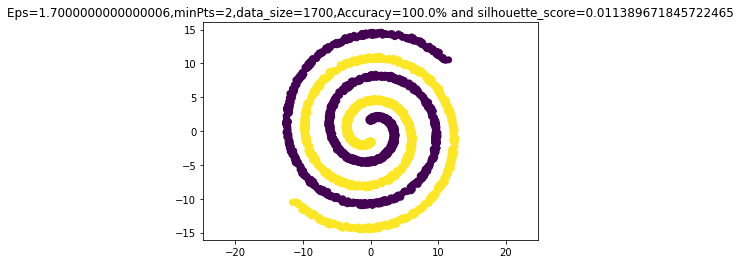

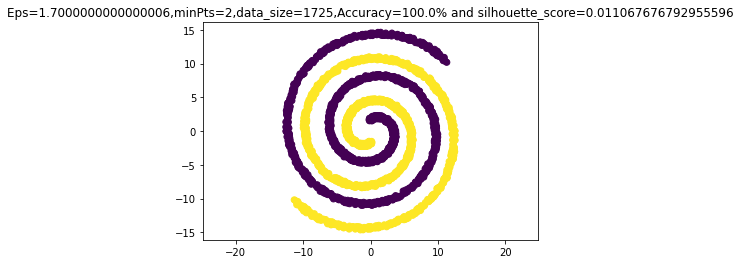

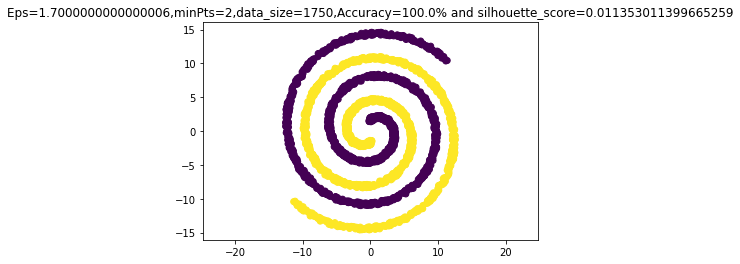

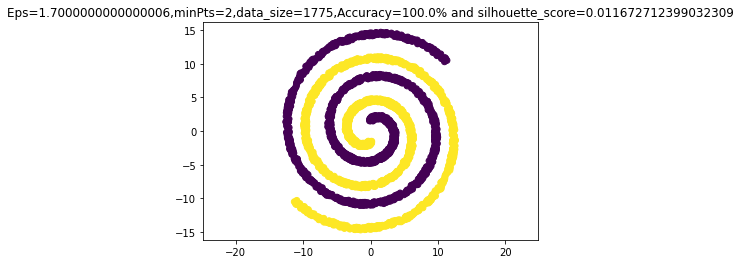

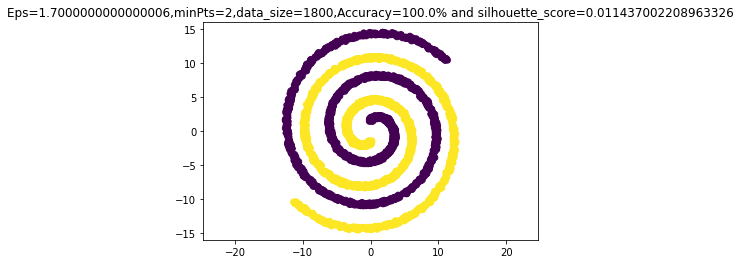

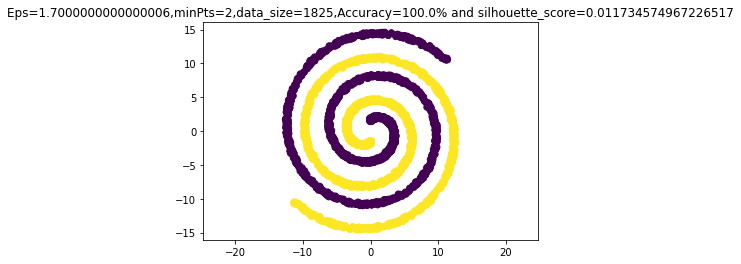

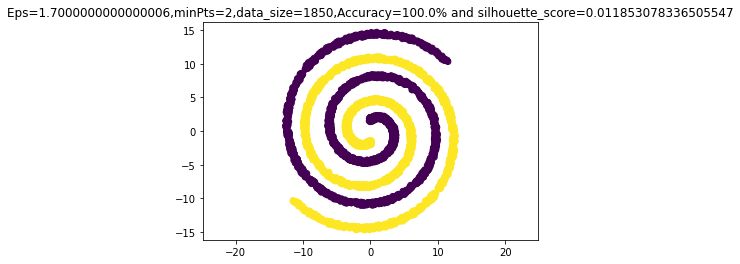

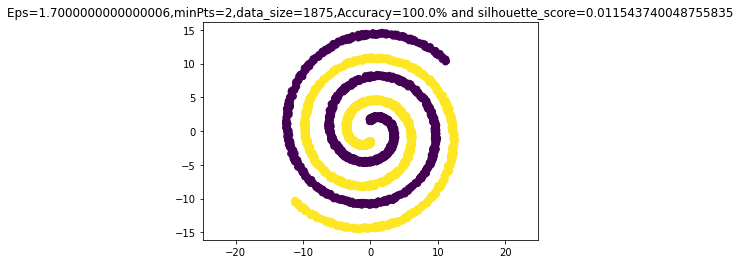

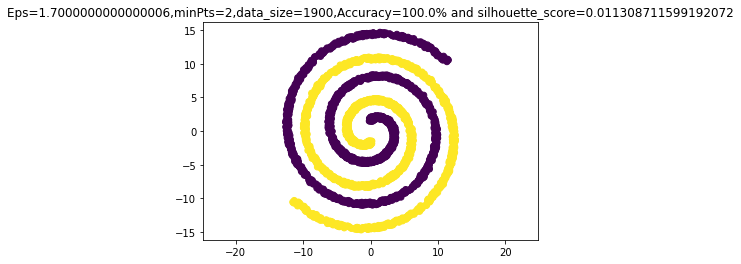

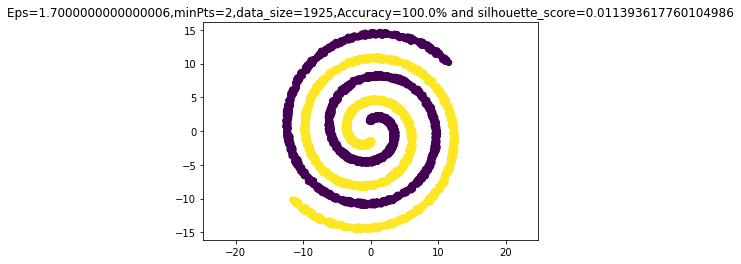

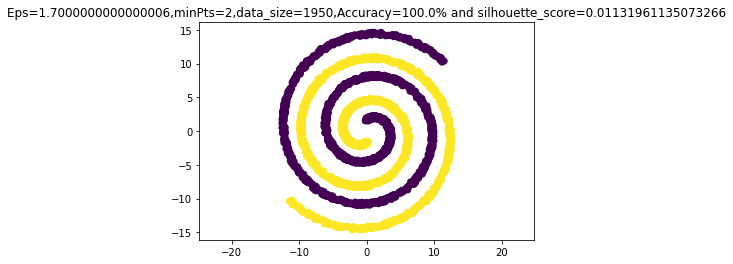

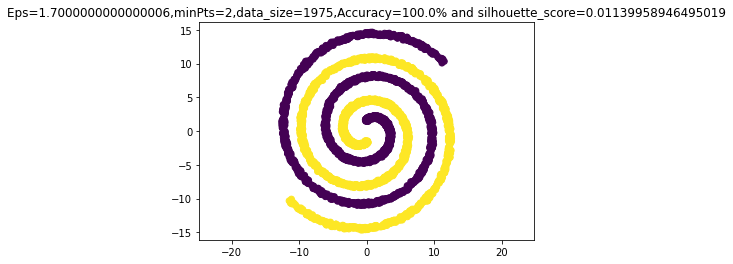

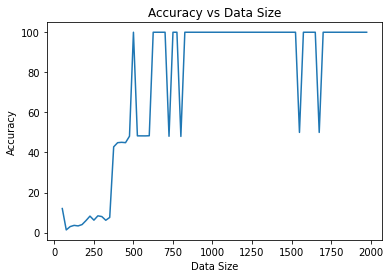

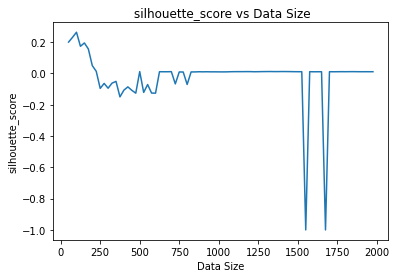

In [130]:

data_size_list=[x for x in range(50,2000,25)]
acc_list=[]
sil_coef=[]
for data_size in data_size_list:
    np.random.seed(10)
    dataset,labels_true=dataset_creation(data_size)
    labels=dbscan(dataset,Eps=best_Eps,minPts=best_minPts)
    #cluster_plot(dataset,labels)
    correct_classified=len(np.argwhere((labels_true==labels)==True))
    acc=(correct_classified*100)/len(dataset)
    acc_list.append(acc)
    #print('acc with funct',accuracy_score(labels_true,labels))
    n_clusters = len(set(labels)) - (1 if None in labels else 0)
    
    #print(f'Accuracy with data size {data_size} is {acc}%')
    
    labels=[x if x !=None else -1 for x in labels]
    if 1 < n_clusters:
        #print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(dataset, labels))
        sil_coef.append(metrics.silhouette_score(dataset, labels))
    else:
        sil_coef.append(-1)
    cluster_plot(dataset,labels,Eps=best_Eps,minPts=best_minPts,data_size=data_size,acc=acc,sil_coef=sil_coef[-1])

plt.plot(data_size_list, acc_list)
plt.title('Accuracy vs Data Size')
plt.xlabel('Data Size')
plt.ylabel('Accuracy')
plt.show()

plt.plot(data_size_list,sil_coef)
plt.title(' silhouette_score vs Data Size')
plt.xlabel('Data Size')
plt.ylabel('silhouette_score')

plt.show()



In [134]:
#(b) Print accuracies for different data_size values.
for data_size, acc in zip(data_size_list, acc_list):
    print('Data Size:',data_size,' Accuracy:',acc)

Data Size: 50  Accuracy: 12.0
Data Size: 75  Accuracy: 1.3333333333333333
Data Size: 100  Accuracy: 3.0
Data Size: 125  Accuracy: 3.6
Data Size: 150  Accuracy: 3.3333333333333335
Data Size: 175  Accuracy: 4.0
Data Size: 200  Accuracy: 6.0
Data Size: 225  Accuracy: 8.222222222222221
Data Size: 250  Accuracy: 6.2
Data Size: 275  Accuracy: 8.363636363636363
Data Size: 300  Accuracy: 8.0
Data Size: 325  Accuracy: 6.153846153846154
Data Size: 350  Accuracy: 7.571428571428571
Data Size: 375  Accuracy: 42.8
Data Size: 400  Accuracy: 44.875
Data Size: 425  Accuracy: 45.05882352941177
Data Size: 450  Accuracy: 44.888888888888886
Data Size: 475  Accuracy: 48.10526315789474
Data Size: 500  Accuracy: 100.0
Data Size: 525  Accuracy: 48.285714285714285
Data Size: 550  Accuracy: 48.27272727272727
Data Size: 575  Accuracy: 48.26086956521739
Data Size: 600  Accuracy: 48.333333333333336
Data Size: 625  Accuracy: 100.0
Data Size: 650  Accuracy: 100.0
Data Size: 675  Accuracy: 100.0
Data Size: 700  Accura

 (c) For what kind of data_size values does the algorithm fail and why? What would you
say are disadvantages of DBSCAN?

Ans: From above graph of accuracy versus data size, we can depict that with Data Size less than 500 DBSCAN fail as data is too sparse and if we keep varying the density then with some values of data size higher than 500 it fail sometimes. 
Note: Here data size 500 means 500(positive)+500(negative)


Disadvantages of DBSCAN:
-> Does not work well when dealing with clusters of varying densities and if the dataset is too sparse.
-> While DBSCAN is great at separating high density clusters from low density clusters, DBSCAN struggles with clusters of similar density.
-> Struggles with high dimensionality data.
-> Sampling affects density measures
-> Sensitive to clusters parameters Eps and minPts